#### 1.It is a special case of Mini batch gradient descent as here batch size is taken=1                                                                               2.Mini Batch G.D is preferrable over SGD bcoz here we can't use Vectorization                                                                                         3. It's convergence rate is faster than both other algo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [2]:
# creatin a sample data
x,y=make_regression(n_samples=10000,n_features=20,n_informative=20,random_state=1,noise=5)
# normalization of sample data
u=np.mean(x,axis=0)
std=np.std(x,axis=0)
x=(x-u)/std

In [3]:
# adding dummy column /feature having all values =1 or X[0]th column using hstack
ones=np.ones((x.shape[0],1))# a matrix
x=np.hstack((ones,x))# in order,NOTE_> in hstack both should be matrix notanyone vector)
print(x.shape)

(10000, 21)


In [9]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    m=X.shape[0]
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

# Batch Gradient Descent Algo
def gradient_descent(X,y,learning_rate = 0.01,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent is calculated by iterating over all data in single epoch
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

# Stochastic Gradient descent Algo-> Batch size=1
def Stochastic_descent_algo(X,Y,batch_sz=1,learning_rate=0.01,max_iters=10):
    n=X.shape[1]
    m=X.shape[0]
    theta=np.zeros((n,))# a vector
    error_list=[]
    error_list_batch=[]
    
    # y used in argument i vector not a matrix
    #Y=Y.reshape((-1,1))# -1 is used one row is not kknown but columns are known==1
    # we are to not assigning y to updated y as we have to use it again in error function
    data_mat=np.hstack((X,Y.reshape(-1,1)))# here y rehsape rerturn another but 'll not update former y'
    # ***NOTE-> reshape doesn't mutate the original araay it just returns the copy***
    for i in range(max_iters):
        e=error(X,Y.reshape((m,)),theta)
        error_list.append(e)
      #  error_list_batch.append(e)
        
        np.random.shuffle(data_mat)# doesn't return it changes the data array # void type
        total_batches=X.shape[0]//batch_sz
        
        for batch in range(total_batches):
            batch_data=data_mat[batch*batch_sz:(batch+1)*batch_sz,:]# here right sided index is not included-> (0,29) if batch size=30
            x_batch=batch_data[:,:-1]
            y_batch=batch_data[:,-1]
            
            # mini batch gradient
            batch_gradient=gradient(x_batch,y_batch,theta)
            theta=theta-learning_rate*batch_gradient
            
            e=error(x_batch,y_batch,theta)
            error_list_batch.append(e)
    return theta,error_list,error_list_batch

In [10]:
theta1,error_list_1=gradient_descent(x,y)
theta,error_list_2,error_list_batch=Stochastic_descent_algo(x,y)

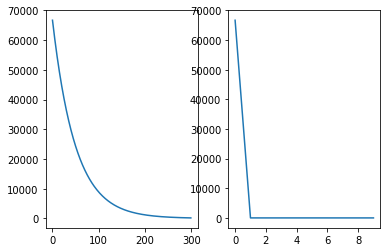

In [11]:
# this is plot of error(after each epoch not after each batch) vas lenght of list
plt.subplot(1,2,1)
plt.plot(np.arange(len(error_list_1)),error_list_1)

plt.subplot(1,2,2)
plt.plot(np.arange(len(error_list_2)),error_list_2)
plt.show()
# so we can clearly see that 2nd one (Stochastic gradient algo ) converges faster than Batch gardient algo and MBGD (both)
# 2nd one reached nearly to correct theta in very less length of list

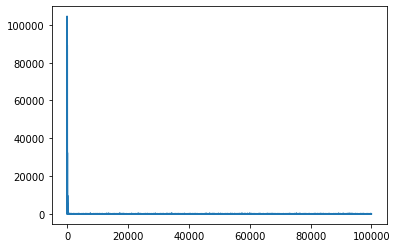

In [14]:
# To see the NOISY effetc plot error list containing erros after each batch va lenght array
# bu to get it clearly take min iteration(here 10 taken on 10000 examples and batch size=1
#) an lesst learning rate
plt.figure()
plt.plot(np.arange(len(error_list_batch)),error_list_batch)
plt.show()

In [15]:
# Final loss 
print(error_list_1[-1])# after 300 epochs

print(error_list_2[-1])# after 10 epochs

187.9965607323772
28.842147682861704
